# Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime
%matplotlib inline

Defining start and end dates

In [2]:
start = datetime.datetime(1960,1,1)
end = datetime.datetime(2016,1,1)

Importing data

In [3]:
df = web.DataReader(['LABSHPUSA156NRUG', 'IRLTCT01USA156N', 'W273RE1A156NBEA'], 'fred', start, end)
df.columns = ['Wage Share', 'Long-term bonds', 'Profit Share after tax']
df['Profit Share'] = df['Wage Share'].apply(lambda x: 1-x)
df['Long-term bonds'] = df['Long-term bonds'].divide(100)
df['Profit Share after tax'] = df['Profit Share after tax'].divide(100)
df.head()

,Wage Share,Long-term bonds,Profit Share after tax,Profit Share
DATE,,,,
1960-01-01,0.646128,0.040150,0.055,0.353872
1961-01-01,0.643108,0.039025,0.054,0.356892
1962-01-01,0.638176,0.039508,0.061,0.361824
1963-01-01,0.635656,0.040017,0.064,0.364344
1964-01-01,0.633658,0.041508,0.068,0.366342


Defining Capital-Output ratio as $v=2 \Rightarrow R = 1/2$

In [4]:
v = 2

Calculating Pivetti's proposition:

$$
1-\omega = \frac{i_{LP}}{R}
$$

In [5]:
df['pivetti'] = df['Long-term bonds']*v

Comparing movements in $\pi$ and in Pivetti's equation

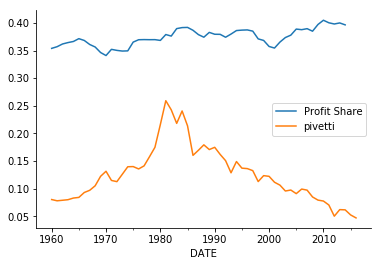

In [6]:
df[['Profit Share','pivetti']].plot()
sns.set_context('paper')
sns.despine()
plt.show()

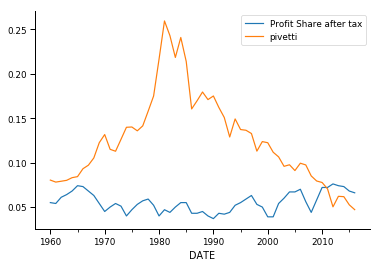

In [7]:
df[['Profit Share after tax','pivetti']].plot()
sns.set_context('paper')
sns.despine()
plt.show()